In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import skew
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import ensemble
from math import sqrt
from sklearn.model_selection import train_test_split
import csv
import os


In [214]:
train=pd.read_csv(r"C:\\Users\\ajodo\Desktop\diamonds.csv")
for col in train.columns: 
    print(col) 

Unnamed: 0
carat
cut
color
clarity
depth
table
price
length in mm
width in mm
depth in mm


In [223]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
length in mm,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
width in mm,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
depth in mm,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [224]:
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940,NaN,NaN,NaN,26970.5,15571.3,1,13485.8,26970.5,40455.2,53940
carat,53940,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940,NaN,NaN,NaN,61.7494,1.43262,43,61,61.8,62.5,79
table,53940,NaN,NaN,NaN,57.4572,2.23449,43,56,57,59,95
price,53940,NaN,NaN,NaN,3932.8,3989.44,326,950,2401,5324.25,18823
length in mm,53940,NaN,NaN,NaN,5.73116,1.12176,0,4.71,5.7,6.54,10.74
width in mm,53940,NaN,NaN,NaN,5.73453,1.14213,0,4.72,5.71,6.54,58.9


In [225]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    53940 non-null  int64  
 1   carat         53940 non-null  float64
 2   cut           53940 non-null  object 
 3   color         53940 non-null  object 
 4   clarity       53940 non-null  object 
 5   depth         53940 non-null  float64
 6   table         53940 non-null  float64
 7   price         53940 non-null  int64  
 8   length in mm  53940 non-null  float64
 9   width in mm   53940 non-null  float64
 10  depth in mm   53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [226]:
corr = train.corr()
corr.sort_values(["price"], ascending = False, inplace = True)#
print(corr.price)

price           1.000000
carat           0.921591
length in mm    0.884435
width in mm     0.865421
depth in mm     0.861249
table           0.127134
depth          -0.010647
Unnamed: 0     -0.306873
Name: price, dtype: float64


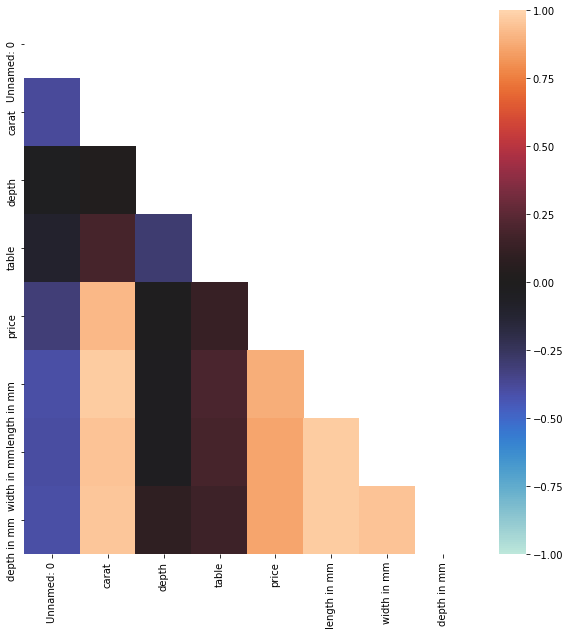

In [227]:
ax = plt.subplots(ncols=1, figsize=(10,10))
corr_matrix = train.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmin = -1, vmax = 1, center = 0);
plt.show()

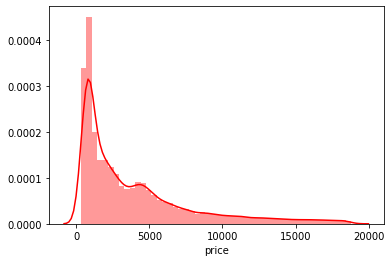

In [228]:
sns.distplot(train['price'], color="r");
plt.show()

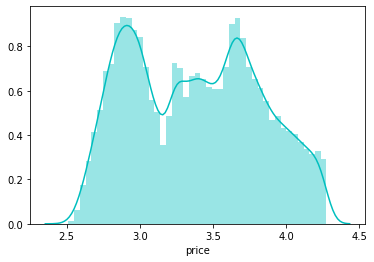

In [229]:
Log_Y = train['price']
sns.distplot(np.log10(Log_Y), color="c");
plt.show()

In [221]:
X.skew(axis = 0, skipna = True).sort_values(ascending=False)

width in mm     2.434167
price           1.618395
depth in mm     1.522423
carat           1.116646
table           0.796896
length in mm    0.378676
Unnamed: 0      0.000000
depth          -0.082294
dtype: float64

In [210]:
train.skew(axis = 0, skipna = True).sort_values(ascending=False)

width in mm     2.434167
depth in mm     1.522423
carat           1.116646
price           0.911103
table           0.796896
length in mm    0.378676
color           0.189366
clarity         0.174917
depth          -0.082294
cut            -0.187443
dtype: float64

In [211]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat              0.64
cut                1.00
color              3.00
clarity            3.00
depth              1.50
table              3.00
price           4374.25
length in mm       1.83
width in mm        1.82
depth in mm        1.13
dtype: float64


In [212]:
train["price"] = np.where(train["price"] <646.0, 646.0,train['price'])
train["price"] = np.where(train["price"] >9821.0, 9821.0,train['price'])
print(train['price'].skew())

0.9111029638430265


In [213]:
print(train['price'].quantile(0.10))
print(train['price'].quantile(0.90))

646.0
9821.0


In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

In [36]:
X

,Unnamed: 0,carat,cut,color,clarity,depth,table,length in mm,width in mm,depth in mm
0,1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,53938,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,53939,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [37]:
X.drop('Unnamed: 0', axis=1, inplace=True) 

In [38]:
X

,carat,cut,color,clarity,depth,table,length in mm,width in mm,depth in mm
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [222]:
y=train["price"]
X = train.drop(["price"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((43152, 10), (43152,), (10788, 10), (10788,))

In [124]:
forest_model = RandomForestRegressor(random_state=10, n_estimators=300)

In [125]:
forest_train = forest_model.fit(X,y)

In [121]:
y_pred = forest_train.predict(X)

In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  float64
 2   color         53940 non-null  float64
 3   clarity       53940 non-null  float64
 4   depth         53940 non-null  float64
 5   table         53940 non-null  float64
 6   price         53940 non-null  float64
 7   length in mm  53940 non-null  float64
 8   width in mm   53940 non-null  float64
 9   depth in mm   53940 non-null  float64
dtypes: float64(10)
memory usage: 4.1 MB


In [122]:
#RMSE
print(np.sqrt(mean_squared_error(y,y_pred)))
#Accuracy 
print(r2_score(y, y_pred))

312.40202472577016
0.9938678620989425


In [116]:
Gradient_model=GradientBoostingRegressor(random_state=10, n_estimators=3)
Gradient_train = Gradient_model.fit(X,y)
y_pred=Gradient_train.predict(X)

In [118]:
#RMSE
print(np.sqrt(mean_squared_error(y,y_pred)))
#Accuracy 
print(r2_score(y, y_pred))

3054.4552832291724
0.4137919527984062


In [111]:
import xgboost as xgb

In [113]:
xgb_model = xgb.XGBRegressor(random_state=10, n_estimators=3)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

#RMSE
print(np.sqrt(mean_squared_error(y,y_pred)))
#mse=mean_squared_error(y, y_pred)

#Accuracy 
print(r2_score(y, y_pred))

2073.2194963693173
0.7299309595258849


In [140]:
import statsmodels.api as sm

In [142]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

In [143]:

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.123e+32
Date:                Tue, 30 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:07:35   Log-Likelihood:                          3008.4
No. Observations:                 100   AIC:                                     -6011.
Df Residuals:                      97   BIC:                                     -6003.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.7493   2.16e-15   4.04e+15      0.000       8.749       8.749
x2            77.1071    2.2e-15    3.5e+16      0.000      77.107      77.107
x3            11.6879   2.33e-15   5.03e+15      0.000      11.688      11.688
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                0.891
Skew:                           0.098   Prob(JB):                        0.640
Kurtosis:                       3.418   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions)
print(lm.score(X,y))
print(lm.coef_)
print(lm.intercept_)

[  15.98043533 -162.80609193  136.46299611   12.10685907  134.59290084
   69.02877795   17.22436781   13.79252908   33.00230093  -96.45188347
  -99.15077696   -5.65663393  -41.03254769  -23.60651986   20.7991138
   26.16436161  -25.74219822  -33.02728627  -40.66679771 -120.37738924
  -85.54543994    7.77603514 -147.80112554   58.44255242   -2.95711013
  -16.18989667  -45.69871741   87.99790705  -31.73436251  -31.21668922
   10.91383644   41.55103712   74.87257861  -35.37790023  -13.74775884
   56.34357782  -75.9784454    51.81378856   43.20794292   72.8765014
   72.53039218  -74.09765369  -15.96679009   91.38541455  115.62376444
   33.94197095   -0.41380136   43.49304647  -48.33494054  112.98502506
   96.43829609 -122.54734784  189.66138615   79.14176581    1.22416745
   11.69212535  -10.91627527  -75.37868584 -131.69926233   64.60781307
  -50.4046681    19.57053756    1.03011815   -5.01130901    5.9649178
   64.43406276   18.24571771    3.9226509    27.05097023   50.82348066
  -13.716